In [1]:
# load libraries
library(Seurat)
library(ggplot2)
library(tidyverse)
library(gridExtra)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Warning message:
“package ‘ggplot2’ was built under R version 4.3.1”
Warning message:
“package ‘purrr’ was built under R version 4.3.1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dpl

In [2]:
# get data location
dirs <- list.dirs(path = 'data/', recursive = F, full.names = F)

for(x in dirs){
  name <- gsub('_filtered_feature_bc_matrix','', x)
  
  cts <- ReadMtx(mtx = paste0('data/',x,'/matrix.mtx.gz'),
          features = paste0('data/',x,'/features.tsv.gz'),
          cells = paste0('data/',x,'/barcodes.tsv.gz'))
  
  # create seurat objects
  assign(name, CreateSeuratObject(counts = cts))
}

In [3]:
# merge datasets

merged_seurat <- merge(HB17_background, y = c(HB17_PDX, HB17_tumor, HB30_PDX, HB30_tumor, HB53_background,
                             HB53_tumor),
      add.cell.ids = ls()[3:9],
      project = 'HB')


merged_seurat

An object of class Seurat 
33538 features across 77936 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

In [4]:
# QC & filtering -----------------------

View(merged_seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>
HB17_background_AAACCCAAGCACGGAT-1,SeuratProject,1863,818
HB17_background_AAACCCACAACTGAAA-1,SeuratProject,8974,2058
HB17_background_AAACCCACATTCACCC-1,SeuratProject,790,533
HB17_background_AAACCCAGTACGGTTT-1,SeuratProject,6579,2180
HB17_background_AAACCCAGTATCGAGG-1,SeuratProject,2507,846
HB17_background_AAACCCAGTATGAGCG-1,SeuratProject,1803,1026
HB17_background_AAACCCAGTTAGAAGT-1,SeuratProject,2075,1183
HB17_background_AAACCCAGTTCCGCTT-1,SeuratProject,4685,1812
HB17_background_AAACCCAGTTCGGCTG-1,SeuratProject,947,627


In [5]:
# create a sample column
merged_seurat$sample <- rownames(merged_seurat@meta.data)

In [6]:
# split sample column
merged_seurat@meta.data <- separate(merged_seurat@meta.data, col = 'sample', into = c('Patient', 'Type', 'Barcode'), 
         sep = '_')

In [7]:
# calculate mitochondrial percentage
merged_seurat$mitoPercent <- PercentageFeatureSet(merged_seurat, pattern='^MT-')

In [8]:
# filtering
merged_seurat_filtered <- subset(merged_seurat, subset = nCount_RNA > 800 &
         nFeature_RNA > 500 &
         mitoPercent < 10)

merged_seurat_filtered

merged_seurat

An object of class Seurat 
33538 features across 67851 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

An object of class Seurat 
33538 features across 77936 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

Centering and scaling data matrix

PC_ 1 
Positive:  NKD1, HMGA2, AC016205.1, FRAS1, HS3ST4, KIZ, MBNL3, DCDC2, PEG10, AFP 
	   HUNK, HS3ST5, TSPAN5, AC073050.1, FTL, LGR5, SERPINE2, NRXN3, HDAC2-AS2, DOK6 
	   SNAP25-AS1, TOP2A, MT-CO3, PIP5K1B, KCNQ1, DLGAP1, MME, KITLG, PLCB4, ADAM23 
Negative:  CRP, ABLIM3, CYP2B6, NNMT, ABCB11, C9, CYP3A4, NAMPT, CP, NRG1 
	   AP002518.2, ADRA1A, SLC1A1, GHR, SDS, TCAF2, LINC01348, LINC02197, BCO2, LURAP1L 
	   PALM2-AKAP2, FGF14, GYS2, TGM2, ABCC3, CYP2C9, SERPINE1, AC016831.7, ACSL1, ALDH1A2 
PC_ 2 
Positive:  TCF4, FLI1, MEF2C, ZEB2, SFMBT2, SLC9A9, ST6GALNAC3, COL4A2, PTPRB, PLXDC2 
	   SLC8A1, MRC1, COL4A1, LDB2, PTPRE, FAM49A, ITPKB, ARHGAP31, FLT1, IRAK3 
	   LIMCH1, LRRK1, CELF2, PRKCH, AKT3, SRGAP1, ERG, EGFL7, ETS1, MS4A6A 
Negative:  NKD1, ARHGEF10L, PCSK6, AL139383.1, SNAP25-AS1, DCDC2, HMGA2, MBNL3, SMOC1, FRAS1 
	   NEDD4L, LGR5, HS3ST5, LIN7A, SLC2A14, TPST1, LINC02532, AC092142.1, CUX2, CASC9 
	   KIZ, GPT2, HDAC2-AS2, SNAP25, ADGR

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 67851
Number of edges: 2359599

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9401
Number of communities: 38
Elapsed time: 18 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:58:52 UMAP embedding parameters a = 0.9922 b = 1.112

11:58:52 Read 67851 rows and found 20 numeric columns

11:58:52 Using Annoy for neighbor search, n_neighbors = 30

11:58:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:58:57 Writing NN index file to temp file /tmp/RtmpQnBABc/file645e63c479e36

11:58:57 Searching Annoy index using 1 thread, search_k = 3000

11:59:16 Annoy recall = 100%

11:59:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

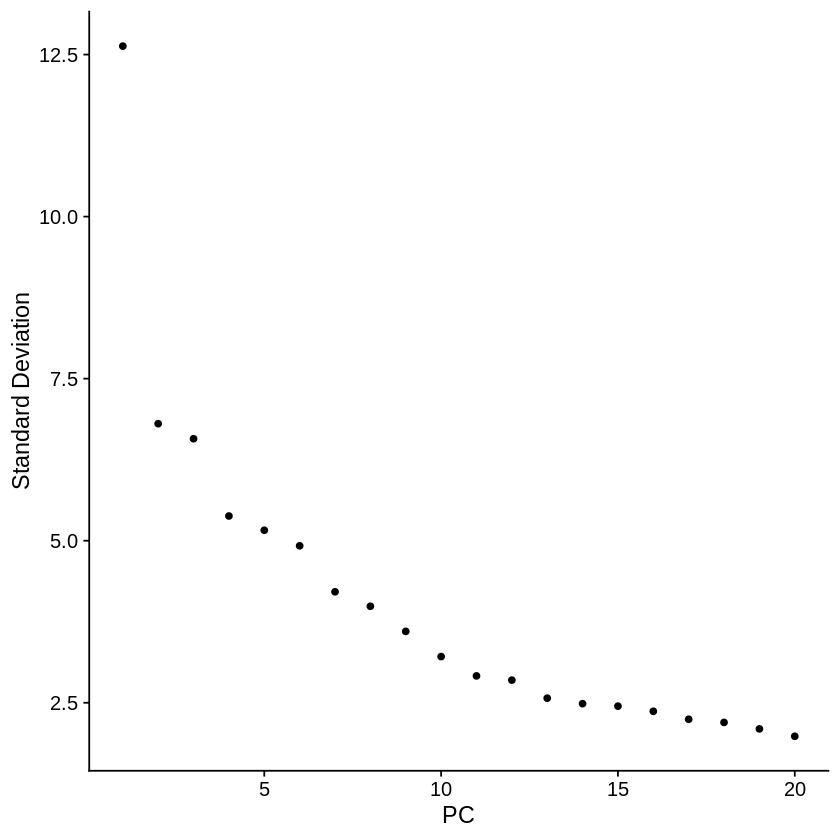

In [9]:
# perform standard workflow steps to figure out if we see any batch effects --------
merged_seurat_filtered <- NormalizeData(object = merged_seurat_filtered)
merged_seurat_filtered <- FindVariableFeatures(object = merged_seurat_filtered)
merged_seurat_filtered <- ScaleData(object = merged_seurat_filtered)
merged_seurat_filtered <- RunPCA(object = merged_seurat_filtered)
ElbowPlot(merged_seurat_filtered)
merged_seurat_filtered <- FindNeighbors(object = merged_seurat_filtered, dims = 1:20)
merged_seurat_filtered <- FindClusters(object = merged_seurat_filtered)
merged_seurat_filtered <- RunUMAP(object = merged_seurat_filtered, dims = 1:20)


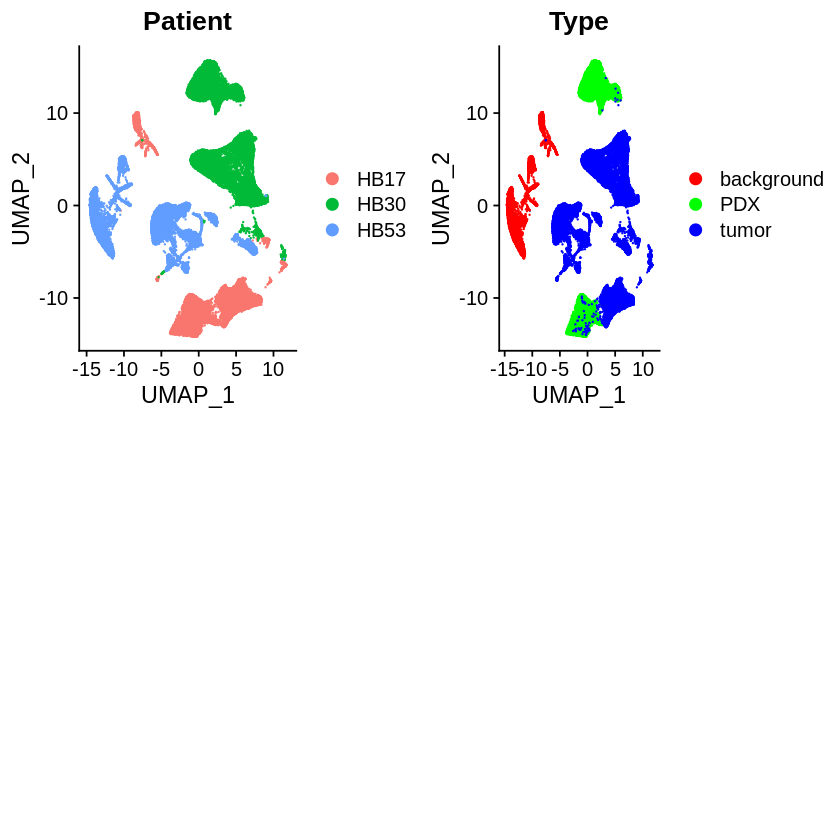

In [10]:
# plot
p1 <- DimPlot(merged_seurat_filtered, reduction = 'umap', group.by = 'Patient')
p2 <- DimPlot(merged_seurat_filtered, reduction = 'umap', group.by = 'Type',
        cols = c('red','green','blue'))

grid.arrange(p1, p2, ncol = 2, nrow = 2)

In [ ]:
# perform integration to correct for batch effects ------
obj.list <- SplitObject(merged_seurat_filtered, split.by = 'Patient')
for(i in 1:length(obj.list)){
  obj.list[[i]] <- NormalizeData(object = obj.list[[i]])
  obj.list[[i]] <- FindVariableFeatures(object = obj.list[[i]])
}


In [ ]:
# select integration features
features <- SelectIntegrationFeatures(object.list = obj.list)

In [ ]:
# find integration anchors (CCA)
anchors <- FindIntegrationAnchors(object.list = obj.list,
                       anchor.features = features)

In [ ]:
# Scale data, run PCA and UMAP and visualize integrated data
seurat.integrated <- ScaleData(object = seurat.integrated)
seurat.integrated <- RunPCA(object = seurat.integrated)
seurat.integrated <- RunUMAP(object = seurat.integrated, dims = 1:50)

In [ ]:
p3 <- DimPlot(seurat.integrated, reduction = 'umap', group.by = 'Patient')
p4 <- DimPlot(seurat.integrated, reduction = 'umap', group.by = 'Type',
              cols = c('red','green','blue'))


grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)